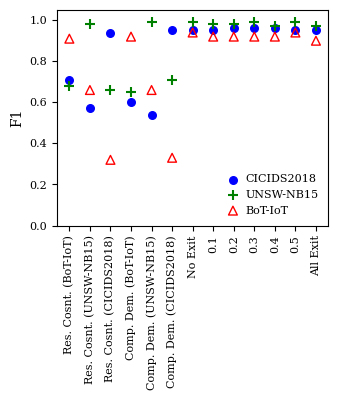

In [7]:
import matplotlib.pyplot as plt

labels = [
    "Res. Cosnt. (BoT-IoT)", "Res. Cosnt. (UNSW-NB15)", "Res. Cosnt. (CICIDS2018)",
    "Comp. Dem. (BoT-IoT)", "Comp. Dem. (UNSW-NB15)", "Comp. Dem. (CICIDS2018)",
    "No Exit",
    "0.1", "0.2", "0.3", "0.4", "0.5",
    "All Exit"
]

qtd_elementos = len(labels)

valores_lista_bot = [0.91, 0.66, 0.32, 0.92, 0.66, 0.33, 0.94, 0.92, 0.92, 0.92, 0.92, 0.94, 0.90]

valores_lista_unsw = [0.68, 0.98, 0.66, 0.65, 0.99, 0.71, 0.99, 0.98, 0.98, 0.99, 0.97, 0.99, 0.97]

valores_lista_cic = [0.71, 0.57, 0.94, 0.60, 0.54, 0.95, 0.95, 0.95, 0.96, 0.96, 0.96, 0.95, 0.95]


x_indices = range(qtd_elementos)

width = 3.5
height = width * 0.8

fig, ax = plt.subplots(figsize=(width, height))

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif"],
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 10,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
    "mathtext.fontset": "stix",
})

plt.rcParams.update(tex_fonts)


plt.scatter(x_indices, valores_lista_cic, marker='o', color='blue', label='CICIDS2018', s=30)
plt.scatter(x_indices, valores_lista_unsw, marker='+', color='green', label='UNSW-NB15', s=50)
plt.scatter(x_indices, valores_lista_bot, marker='^', color='red', label='BoT-IoT', s=40, facecolors='none', edgecolors='red')

plt.xticks(ticks=x_indices, labels=labels, rotation=90)

plt.ylabel('F1')

plt.ylim(0, 1.05)
plt.grid(False)

plt.legend(frameon=False, loc='lower right', handletextpad=0.1)
plt.savefig('graficos/compacuracia.pdf', bbox_inches='tight', pad_inches=0.02)

plt.show()